  Exploratory Data Analysis

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
os.chdir('C:\\Users\\user\\Desktop')
customer=pd.read_csv('Customers_Data.csv')
customer.head()

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER
0,1004,OLDER SINGLES/COUPLES,Mainstream
1,1011,OLDER SINGLES/COUPLES,Mainstream
2,1011,OLDER SINGLES/COUPLES,Mainstream
3,1011,OLDER SINGLES/COUPLES,Mainstream
4,1019,OLDER SINGLES/COUPLES,Mainstream


In [21]:
trans=pd.read_csv('Transactions_Data.csv')
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category
0,01-Jan-23,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
1,01-Jan-23,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
2,01-Jan-23,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
3,01-Jan-23,238,238186,242612,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
4,01-Jan-23,144,144001,143893,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips


In [4]:
#Q. Calculate below Key Performance Indicators (Key Metrics) 
    #a. Total Sales

In [30]:
trans['TOT_SALES'] = trans['TOT_SALES'].str.replace('$', '').astype(float)

In [31]:
Total_Sales=trans['TOT_SALES'].sum()

In [32]:
Total_Sales

1933114.9999999995

In [6]:
 # b. Total Customers
Total_customers=customer['PREMIUM_CUSTOMER'].nunique()    
Total_customers

3

In [7]:
 #c. Total Quantity Sold
Total_Quantity_Sold=trans['PROD_QTY'].sum()
Total_Quantity_Sold

504724

In [8]:
 #d. Total Distinct products sold
Total_Distinct_products_sold= trans['PROD_NBR'].nunique()  
Total_Distinct_products_sold   

114

In [24]:
#e.Transactions per Customer
Transactions_per_Customer=trans.groupby('LYLTY_CARD_NBR').size().reset_index(name='Transactions_per_Customer')
Transactions_per_Customer    

,LYLTY_CARD_NBR,Transactions_per_Customer
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1
...,...,...
72631,2370651,1
72632,2370701,1
72633,2370751,1
72634,2370961,2


In [28]:
Transactions_per_Customer['Transactions_per_Customer'].sum()

264834

In [35]:
#f.Products Sales per Transaction


In [36]:

Products_Sales_per_Transaction=trans.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index(name='Product_Sales_per_Transaction')
Products_Sales_per_Transaction

,PROD_NAME,Product_Sales_per_Transaction
0,Burger Rings 220g,6831.0
1,CCs Nacho Cheese 175g,5961.9
2,CCs Original 175g,6048.0
3,CCs Tasty Cheese 175g,6069.0
4,Cheetos Chs & Bacon Balls 190g,9243.3
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,5323.8
110,WW Supreme Cheese Corn Chips 200g,5390.3
111,Woolworths Cheese Rings 190g,5169.6
112,Woolworths Medium Salsa 300g,4050.0


In [37]:
Products_Sales_per_Transaction['Product_Sales_per_Transaction'].sum()

1933115.0

In [38]:
 #g.Average Price per Unit

# Calculate price per unit
trans['price_per_unit'] = trans['TOT_SALES'] /trans['PROD_QTY']

# Calculate the average price per unit
average_price_per_unit = trans['price_per_unit'].mean()
average_price_per_unit
  

3.8246287485745802

In [39]:
#h. Average Sales per Customer

# Calculate total sales per customer
total_sales_per_customer = trans.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index(name='total_sales_per_customer')



In [40]:
# Calculate the average sales per customer
average_sales_per_customer = total_sales_per_customer['total_sales_per_customer'].mean()

average_sales_per_customer

26.613731483011183

In [43]:
#j. Total distinct number of stores
Total_distinct_number_of_stores=trans['STORE_NBR'].nunique()
Total_distinct_number_of_stores    

272

In [49]:
#k. Total distinct number of categories sold
Total_distinct_number_of_categories_sold=trans['Category'].nunique()
Total_distinct_number_of_categories_sold

20

In [50]:
#l. Total distinct number of flavors sold
Total_distinct_number_of_flavors_sold=trans['Flavour'].nunique()
Total_distinct_number_of_flavors_sold

82

In [51]:
#m. Total distinct number of brands sold
Total_distinct_number_of_brands_sold=trans['Brand'].nunique()
Total_distinct_number_of_brands_sold  

31

In [77]:
#n. Total Weighted Sales (in tons)


In [65]:
#Convert Weight to Tons:

trans['weight_in_tons'] = trans['Weight'] / 1_000_000

In [66]:
#Calculate Weighted Sales:
trans['weighted_sales'] = trans['TOT_SALES'] * trans['weight_in_tons']

In [67]:
#Sum the Weighted Sales:

total_weighted_sales = trans['weighted_sales'].sum()
total_weighted_sales

368.5718319999999

In [74]:
#i. Total Weighted Sales (in tons)

#Convert Weight to Tons:

trans['weight_in_tons'] = trans['Weight'] / 1_000_000

#Calculate Weighted Sales:

trans['weighted_sales'] = trans['TOT_SALES'] * trans['weight_in_tons']

In [76]:
#Sum the Weighted Sales:

total_weighted_sales = trans['weighted_sales'].sum()
total_weighted_sales

368.5718319999999

In [ ]:
#o. Total Transactions related categories chips & kettle.

In [59]:
# Step 1: Filter the DataFrame for categories 'chips' and 'kettle'
filtered_trans = trans[trans['Category'].isin(['chips', 'kettle'])]

# Step 2: Count the number of transactions related to 'chips' and 'kettle'
total_transactions = filtered_trans.shape[0]

In [60]:
total_transactions

0

 Perform below brand analysis.

In [ ]:
# a. Total Sales & Percentage of sales by Brand

In [82]:
total_sales_by_brand = trans.groupby('Brand')['TOT_SALES'].sum().reset_index()
total_sales_by_brand

,Brand,TOT_SALES
0,Burger Rings,6831.0
1,CCs Cheese,18078.9
2,Cheetos Puffs,16884.5
3,Cheezels Cheese,40029.9
4,Cobs Chips,70569.8
5,Dorito Corn Chips,39052.0
6,Doritos Cheese,33390.6
7,Doritos Corn Chips,127597.3
8,Doritos Mexicana,26290.0
9,Doritos Salsa,14261.0


In [85]:
total_sales = trans['TOT_SALES'].sum()
total_sales 

1933114.9999999995

In [86]:
#Calculate the Percentage of Sales by Brand:

total_sales_by_brand['percentage_of_sales'] = (total_sales_by_brand['TOT_SALES'] / total_sales) * 100

In [89]:
total_sales_by_brand['percentage_of_sales']

0      0.353367
1      0.935221
2      0.873435
3      2.070746
4      3.650574
5      2.020159
6      1.727295
7      6.600606
8      1.359981
9      0.737721
10     2.670157
11     5.123730
12    20.187097
13     0.416219
14     1.772890
15     4.696311
16     0.410167
17     9.190115
18     3.360095
19     1.556633
20     3.631207
21     7.115035
22     0.875426
23     0.500560
24     4.596338
25     4.127514
26     4.217137
27     2.671719
28     1.378868
29     0.477695
30     0.695980
Name: percentage_of_sales, dtype: float64

In [90]:
total_sales_by_brand['percentage_of_sales'].sum()

100.00000000000003

In [ ]:
#b. Visual representation (choose right chart) of sales across different brands

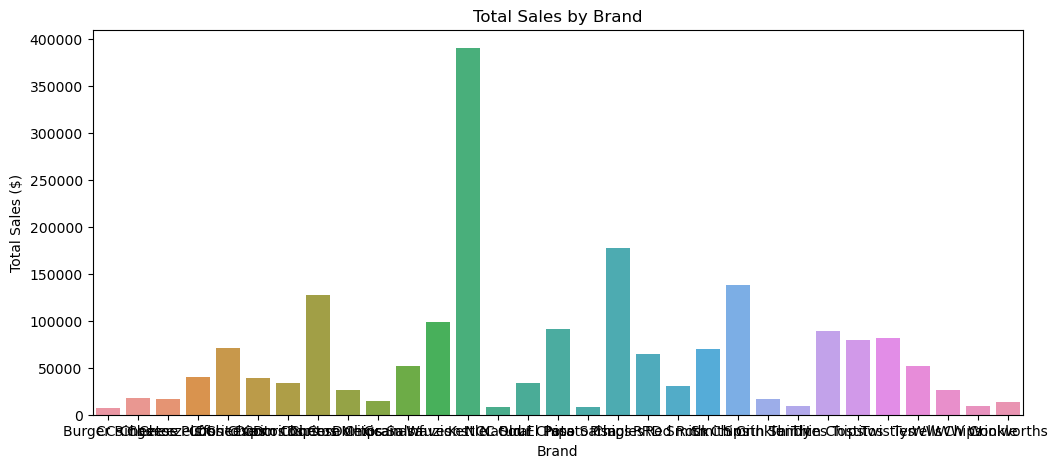

In [104]:
plt.figure(figsize=(12,5))
sns.barplot(x='Brand', y='TOT_SALES', data=total_sales_by_brand)
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales ($)')
plt.show()

In [ ]:
#c. Top performing 5 and worst performing 5 Brands based on percentage of sales  

In [96]:
#Step 1: Calculate the percentage of sales for each brand
trans['percentage_of_sales'] = (trans['TOT_SALES'] / trans['TOT_SALES'].sum()) * 100

# Step 2: Sort the brands based on the percentage of sales
sorted_brands = trans.sort_values(by='percentage_of_sales', ascending=False)

# Step 3: Select the top 5 and bottom 5 brands
top_5_brands = sorted_brands.head(5)
worst_5_brands = sorted_brands.tail(5)

top_5_brands

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category,price_per_unit,weight_in_tons,weighted_sales,percentage_of_sales
33521,15-Feb-23,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.00038,0.01121,0.001526
235015,20-Nov-23,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.00038,0.01121,0.001526
235011,20-Nov-23,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.00038,0.01121,0.001526
33530,15-Feb-23,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.00038,0.01121,0.001526
234258,19-Nov-23,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.00038,0.01121,0.001526


In [97]:
worst_5_brands

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category,price_per_unit,weight_in_tons,weighted_sales,percentage_of_sales
32412,14-Feb-23,180,180119,181775,35,Woolworths Mild Salsa 300g,1,1.5,300.0,Woolworths,Salsa,Woolworths,1.5,0.0003,0.00045,0.000078
195916,27-Sep-23,20,20148,17115,76,Woolworths Medium Salsa 300g,1,1.5,300.0,Woolworths,SalsaMedium,Woolworths,1.5,0.0003,0.00045,0.000078
214694,23-Oct-23,120,120151,123664,76,Woolworths Medium Salsa 300g,1,1.5,300.0,Woolworths,SalsaMedium,Woolworths,1.5,0.0003,0.00045,0.000078
32413,14-Feb-23,265,265335,263676,35,Woolworths Mild Salsa 300g,1,1.5,300.0,Woolworths,Salsa,Woolworths,1.5,0.0003,0.00045,0.000078
241519,29-Nov-23,35,35321,31865,76,Woolworths Medium Salsa 300g,1,1.5,300.0,Woolworths,SalsaMedium,Woolworths,1.5,0.0003,0.00045,0.000078


In [ ]:
#d. Visual aids (choose right chart) to identify the best and worst-performing brands

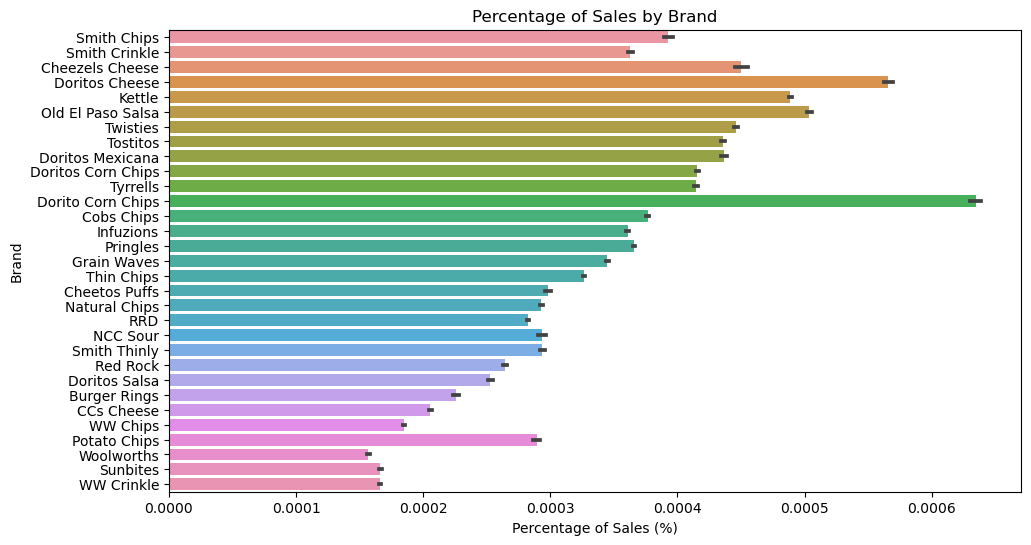

In [110]:
plt.figure(figsize=(11, 6))
sns.barplot(x='percentage_of_sales', y='Brand', data=sorted_brands)
plt.title('Percentage of Sales by Brand')
plt.xlabel('Percentage of Sales (%)')
plt.ylabel('Brand')
plt.show()

In [ ]:
# e. What are the top most brands contributing 80% of sales?

In [109]:
# Step 1: Calculate the cumulative percentage of sales
sorted_brands['cumulative_sales_percentage'] = sorted_brands['TOT_SALES'].cumsum() / sorted_brands['TOT_SALES'].sum() * 100

# Step 2: Find the top brands contributing to 80% of sales
top_brands_80_percent_sales = sorted_brands[sorted_brands['cumulative_sales_percentage'] <= 80]
top_brands_80_percent_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category,price_per_unit,weight_in_tons,weighted_sales,percentage_of_sales,cumulative_sales_percentage
33521,15-Feb-23,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.000380,0.01121,0.001526,0.001526
235015,20-Nov-23,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.000380,0.01121,0.001526,0.003052
235011,20-Nov-23,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.000380,0.01121,0.001526,0.004578
33530,15-Feb-23,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.000380,0.01121,0.001526,0.006104
234258,19-Nov-23,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smith Chips,g Bag,Chips,5.9,0.000380,0.01121,0.001526,0.007630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,23-Jul-23,133,133082,136501,97,RRD Salt & Vinegar 165g,2,6.0,165.0,RRD,Cheese,RRD,3.0,0.000165,0.00099,0.000310,79.998743
147696,23-Jul-23,105,105091,105832,97,RRD Salt & Vinegar 165g,2,6.0,165.0,RRD,Cheese,RRD,3.0,0.000165,0.00099,0.000310,79.999053
147695,23-Jul-23,259,259005,257434,97,RRD Salt & Vinegar 165g,2,6.0,165.0,RRD,Cheese,RRD,3.0,0.000165,0.00099,0.000310,79.999364
215805,25-Oct-23,269,269161,266009,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175.0,NCC Sour,Chives,Sour,3.0,0.000175,0.00105,0.000310,79.999674


In [ ]:
# f. A tabular format presenting brand-wise analysis of metrics such as total sales, total transactions with this brand, 
#quantity sold, weights sold, etc  (rows - brands, columns - metrics)

In [121]:
# Group by brand and aggregate metrics
metrics_brands = trans.groupby('Brand').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_transactions=('TXN_ID', 'count'),
    total_quantity_sold=('PROD_QTY', 'sum'),
    total_weight_sold=('Weight', 'sum')
).reset_index()

# Rename columns 
metrics_brands.columns = ['Brand', 'Total Sales ($)', 'Total Transactions', 'Total Quantity Sold', 'Total Weight Sold (g)']

# Convert weight from grams to kilograms 
metrics_brands['Total Weight Sold (kg)'] = metrics_brands['Total Weight Sold (g)'] / 1000

metrics_brands

,Brand,Total Sales ($),Total Transactions,Total Quantity Sold,Total Weight Sold (g),Total Weight Sold (kg)
0,Burger Rings,6831.0,1564,2970,344080.0,344.080
1,CCs Cheese,18078.9,4551,8609,796425.0,796.425
2,Cheetos Puffs,16884.5,2927,5530,519930.0,519.930
3,Cheezels Cheese,40029.9,4603,8747,1220920.0,1220.920
4,Cobs Chips,70569.8,9693,18571,1066230.0,1066.230
5,Dorito Corn Chips,39052.0,3183,6109,1209540.0,1209.540
6,Doritos Cheese,33390.6,3052,5858,1007160.0,1007.160
7,Doritos Corn Chips,127597.3,15874,30389,2571060.0,2571.060
8,Doritos Mexicana,26290.0,3115,5975,529550.0,529.550
9,Doritos Salsa,14261.0,2921,5485,876300.0,876.300


Q.  Perform below category analysis.    

In [ ]:
#a. Total Sales, Total Transactions, Total quantity, Total weight by Category

In [123]:
# Group by category and aggregate metrics
category_metrics = trans.groupby('Category').agg(
    total_sales=('TOT_SALES', 'sum'),
     total_transactions=('TXN_ID', 'count'),
    total_quantity_sold=('PROD_QTY', 'sum'),
    total_weight_sold=('Weight', 'sum')
).reset_index()

# Rename columns
category_metrics.columns = ['Category', 'Total Sales ($)', 'Total Transactions', 'Total Quantity Sold', 'Total Weight Sold (g)']

# Convert weight from grams to kilograms
category_metrics['Total Weight Sold (kg)'] = category_metrics['Total Weight Sold (g)'] / 1000
category_metrics

,Category,Total Sales ($),Total Transactions,Total Quantity Sold,Total Weight Sold (g),Total Weight Sold (kg)
0,Cheese,91499.4,12206,23214,3024505.0,3024.505
1,Chips,464925.1,66950,127569,12254450.0,12254.450
2,Crinkle,146776.2,22476,42595,4702065.0,4702.065
3,Infuzions,99047.6,14201,27119,1501830.0,1501.830
4,Kettle,390239.8,41288,79051,6619895.0,6619.895
5,Mexicana,26290.0,3115,5975,529550.0,529.550
6,Pringles,177655.5,25102,48019,3363668.0,3363.668
7,Puffs,16884.5,2927,5530,519930.0,519.930
8,RRD,64954.5,11894,22500,1895205.0,1895.205
9,Rings,6831.0,1564,2970,344080.0,344.080


In [125]:
#b. Which category contributes maximum sales, and its contribution of total sales, its percentage contribution of total sales?

# Group by category and calculate total sales
category_sales = trans.groupby('Category')['TOT_SALES'].sum().reset_index()

#category with maximum sales
max_sales_category = category_sales.loc[category_sales['TOT_SALES'].idxmax()]

# Calculate total sales
total_sales = category_sales['TOT_SALES'].sum()

# Calculate percentage contribution of total sales
max_sales_contribution = max_sales_category['TOT_SALES']
sales_percentage = (max_sales_contribution / total_sales) * 100
sales_percentage

24.053029695532707

In [128]:
#c.

# Group by category and calculate total sales
category_sales = trans.groupby('Category')['TOT_SALES'].sum().reset_index()

# Sort categories by total sales in descending order
category_sales = category_sales.sort_values(by='TOT_SALES', ascending=False)

# Calculate cumulative sales and total sales
category_sales['cumulative_sales'] = category_sales['TOT_SALES'].cumsum()
total_sales = category_sales['TOT_SALES'].sum()

# Calculate cumulative sales percentage
category_sales['cumulative_sales_percentage'] = (category_sales['cumulative_sales'] / total_sales) * 100

# Identify top categories contributing to 80% of total sales
pareto_analysis = category_sales[category_sales['cumulative_sales_percentage'] <= 80]
pareto_analysis

,Category,TOT_SALES,cumulative_sales,cumulative_sales_percentage
1,Chips,464925.1,464925.1,24.053030
4,Kettle,390239.8,855164.9,44.242195
6,Pringles,177655.5,1032820.4,53.433251
2,Crinkle,146776.2,1179596.6,61.026759
11,Salsa,105046.1,1284642.7,66.461348
3,Infuzions,99047.6,1383690.3,71.585604
0,Cheese,91499.4,1475189.7,76.319350


Q.  Perform below Customer Category Analysis.

In [ ]:
# a. Sales distribution among different customer categories and visualize the same by choosing right chart

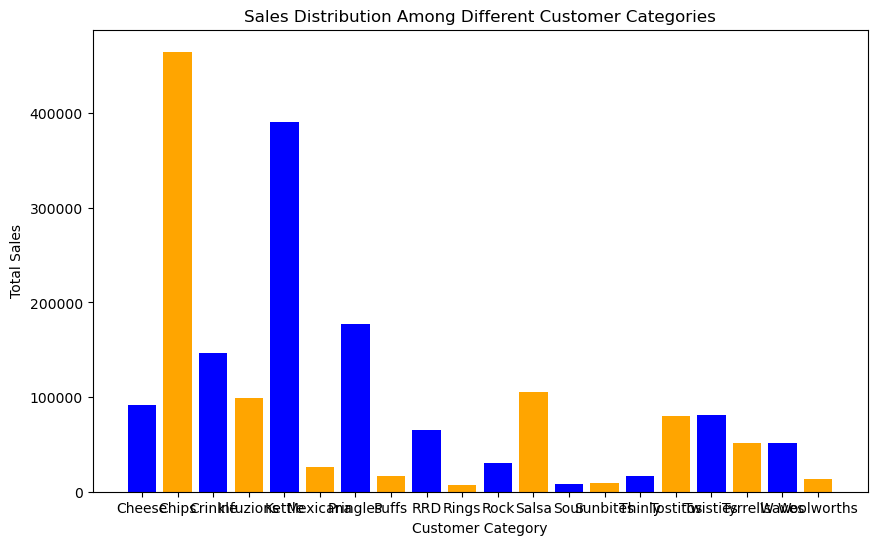

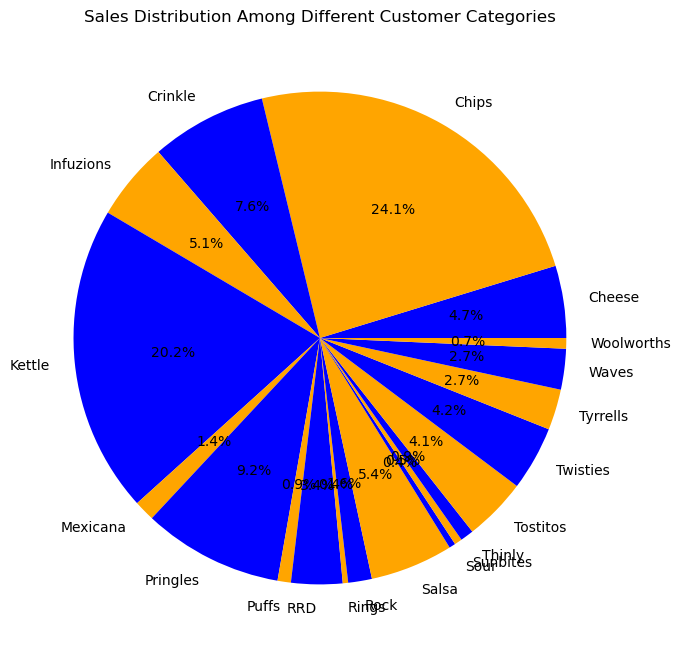

In [129]:
# Group by customer category and calculate total sales
category_sales = trans.groupby('Category')['TOT_SALES'].sum().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['TOT_SALES'], color=['blue', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Among Different Customer Categories')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales['TOT_SALES'], labels=category_sales['Category'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Sales Distribution Among Different Customer Categories')
plt.show()

In [ ]:
#  b. Weight distribution among customer segments and visualize the same by choosing right chart 

In [131]:
# Group by customer segment and calculate total weight
segment_weight = trans.groupby('PREMIUM_CUSTOMER')['Weight'].sum().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(segment_weight['PREMIUM_CUSTOMER'], segment_weight['Weight'], color=['blue', 'orange'])
plt.xlabel('Customer Segment')
plt.ylabel('Total Weight (kg)')
plt.title('Weight Distribution Among Different Customer Segments')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_weight['Weight'], labels=segment_weight['PREMIUM_CUSTOMER'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Weight Distribution Among Different Customer Segments')
plt.show()

KeyError: 'PREMIUM_CUSTOMER'

In [ ]:
#A tabular format presenting category-wise analysis of metrics such as total sales, total transactions with this brand, 
#quantity sold, weights sold, etc  (rows - categories, columns - metrics)

In [133]:
# Group by category and calculate metrics
category_metrics = trans.groupby('Category').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_transactions=('TXN_ID', 'count'),
    total_quantity_sold=('PROD_QTY', 'sum'),
    total_weight_sold=('Weight', 'sum')
).reset_index()

# Transpose DataFrame
category_metrics = category_metrics.T

# Set the first row as column headers
category_metrics.columns = category_metrics.iloc[0]

# Remove the first row
category_metrics = category_metrics[1:]
category_metrics

Category,Cheese,Chips,Crinkle,Infuzions,Kettle,Mexicana,Pringles,Puffs,RRD,Rings,Rock,Salsa,Sour,Sunbites,Thinly,Tostitos,Twisties,Tyrrells,Waves,Woolworths
total_sales,91499.4,464925.1,146776.2,99047.6,390239.8,26290.0,177655.5,16884.5,64954.5,6831.0,30091.5,105046.1,8046.0,9676.4,16923.0,79789.6,81522.1,51647.4,51617.2,13454.1
total_transactions,12206,66950,22476,14201,41288,3115,25102,2927,11894,1564,5885,12245,1419,3008,2980,9471,9454,6442,7740,4437
total_quantity_sold,23214,127569,42595,27119,79051,5975,48019,5530,22500,2970,11146,23290,2682,5692,5641,18134,18118,12298,14726,8395
total_weight_sold,3024505.0,12254450.0,4702065.0,1501830.0,6619895.0,529550.0,3363668.0,519930.0,1895205.0,344080.0,882750.0,3673500.0,248325.0,270720.0,521500.0,1657425.0,2489200.0,1062930.0,1581360.0,1164340.0


Q.  Perform below Store Analysis    

In [ ]:
#a. Total Sales, Total Sales percentage, Total Quantity, Total weight in tons, Total number of categories, 
#Total number of brands, Total number of flavors, Total number of customers by Store Number

In [135]:
# Calculate total sales, total quantity, total weight in tons, total number of categories, total number of brands,
# total number of flavors, and total number of customers by store number
metrics = trans.groupby('STORE_NBR').agg(
    Total_Sales=('TOT_SALES', 'sum'),
    Total_Quantity=('PROD_QTY', 'sum'),
    Total_Weight_tons=('Weight', 'sum'),
    Total_Categories=('Category', 'nunique'),
    Total_Brands=('Brand', 'nunique'),
    Total_Flavors=('Flavour', 'nunique'),
    Total_Customers=('LYLTY_CARD_NBR', 'nunique')
).reset_index()

# Calculate total sales percentage
total_sales = metrics['TOT_SALES'].sum()
metrics['Total_Sales_Percentage'] = (metrics['TOT_SALES'] / total_sales) * 100

# Convert total weight to tons (if weight is in grams)
metrics['Total_Weight_tons'] /= 1000

KeyError: 'TOT_SALES'

In [ ]:
# b.Visualize the Total Sales for comparison of sales across different stores

In [ ]:
# Create a bar chart for total sales across different stores
plt.figure(figsize=(10, 6))
plt.bar(trans['STORE_NBR'], trans['TOT_SALES'], color='skyblue')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales Across Different Stores')
plt.xticks(trans['Store_Number'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#c.Visual depiction of the top 10-performing & worst 10 performance stores in terms of sales

In [ ]:
# Sort the DataFrame by total sales
trans_sorted = trans.sort_values(by='TOT_SALES', ascending=False)

# Extract top 10 and worst 10 performing stores
top_10_stores = trans_sorted.head(10)
worst_10_stores = trans_sorted.tail(10)

# Create a horizontal bar chart for top 10 performing stores
plt.figure(figsize=(10, 6))
plt.barh(top_10_stores['STORE_NBR'], top_10_stores['TOT_SALES'], color='green')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.title('Top 10 Performing Stores in Terms of Sales')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a horizontal bar chart for worst 10 performing stores
plt.figure(figsize=(10, 6))
plt.barh(worst_10_stores['STORE_NBR'], worst_10_stores['TOT_SALES'], color='red')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.title('Worst 10 Performing Stores in Terms of Sales')
plt.gca().invert_yaxis()  # Invert y-axis to display the lowest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q.  Perform below analysis related Sales Trends, patterns and seasonality.

In [145]:
cust_trans=pd.merge(customer,trans,how='left',on='LYLTY_CARD_NBR')
cust_trans.head()

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category,price_per_unit,weight_in_tons,weighted_sales,percentage_of_sales
0,1004,OLDER SINGLES/COUPLES,Mainstream,05-May-23,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,WW Chips,Chips,Chips,1.9,0.00016,0.000304,0.000098
1,1011,OLDER SINGLES/COUPLES,Mainstream,29-Jan-23,1.0,12.0,84.0,GrnWves Plus Btroot & Chilli Jam 180g,2.0,6.2,180.0,Grain Waves,i Jam,Waves,3.1,0.00018,0.001116,0.000321
2,1011,OLDER SINGLES/COUPLES,Mainstream,11-May-23,1.0,13.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,1.0,5.1,300.0,Old El Paso Salsa,o Med,Salsa,5.1,0.00030,0.001530,0.000264
3,1011,OLDER SINGLES/COUPLES,Mainstream,03-Jun-23,1.0,14.0,49.0,Infuzions SourCream&Herbs Veg Strws 110g,1.0,3.8,110.0,Infuzions,Strws,Infuzions,3.8,0.00011,0.000418,0.000197
4,1011,OLDER SINGLES/COUPLES,Mainstream,21-Jun-23,1.0,15.0,1.0,Smiths Crinkle Cut Chips Barbecue 170g,1.0,2.9,170.0,Smith Crinkle,Barbecue,Crinkle,2.9,0.00017,0.000493,0.000150


In [147]:
trans['DATE']=pd.to_datetime(trans['DATE'],format='%d-%b-%y')

In [148]:
trans['Month Name'] =trans['DATE'].dt.month_name()

In [150]:
cust_trans.head()

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category,price_per_unit,weight_in_tons,weighted_sales,percentage_of_sales
0,1004,OLDER SINGLES/COUPLES,Mainstream,05-May-23,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,WW Chips,Chips,Chips,1.9,0.00016,0.000304,0.000098
1,1011,OLDER SINGLES/COUPLES,Mainstream,29-Jan-23,1.0,12.0,84.0,GrnWves Plus Btroot & Chilli Jam 180g,2.0,6.2,180.0,Grain Waves,i Jam,Waves,3.1,0.00018,0.001116,0.000321
2,1011,OLDER SINGLES/COUPLES,Mainstream,11-May-23,1.0,13.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,1.0,5.1,300.0,Old El Paso Salsa,o Med,Salsa,5.1,0.00030,0.001530,0.000264
3,1011,OLDER SINGLES/COUPLES,Mainstream,03-Jun-23,1.0,14.0,49.0,Infuzions SourCream&Herbs Veg Strws 110g,1.0,3.8,110.0,Infuzions,Strws,Infuzions,3.8,0.00011,0.000418,0.000197
4,1011,OLDER SINGLES/COUPLES,Mainstream,21-Jun-23,1.0,15.0,1.0,Smiths Crinkle Cut Chips Barbecue 170g,1.0,2.9,170.0,Smith Crinkle,Barbecue,Crinkle,2.9,0.00017,0.000493,0.000150


In [153]:
#a. Which months have had the highest sales, what is the sales amount and contribution in percentage?

# Group by month and calculate total sales
monthly_sales = trans.groupby('Month Name')['TOT_SALES'].sum().reset_index()

# Find the month with the highest sales
highest_sales_month = monthly_sales.loc[monthly_sales['TOT_SALES'].idxmax()]

# Calculate contribution percentage of the highest sales month
total_sales = monthly_sales['TOT_SALES'].sum()
contribution_percentage = (highest_sales_month['TOT_SALES'] / total_sales) * 100
contribution_percentage

8.623882970660407

In [ ]:
#b. Which months have had the least sales, what is the sales amount and contribution in percentage?

In [157]:

# Group by month and calculate total sales
monthly_sales = trans.groupby('Month Name')['TOT_SALES'].sum().reset_index()

# Find the month with the least sales
lowest_sales_month = monthly_sales.loc[monthly_sales['TOT_SALES'].idxmin()]

# Calculate contribution percentage of the lowest sales month
total_sales = monthly_sales['TOT_SALES'].sum()
contribution_percentage = (lowest_sales_month['TOT_SALES'] / total_sales) * 100
contribution_percentage

7.375047661125646

In [ ]:
#c. A visual representation in the form of a bar chart/line chart illustrated the sales trend by month

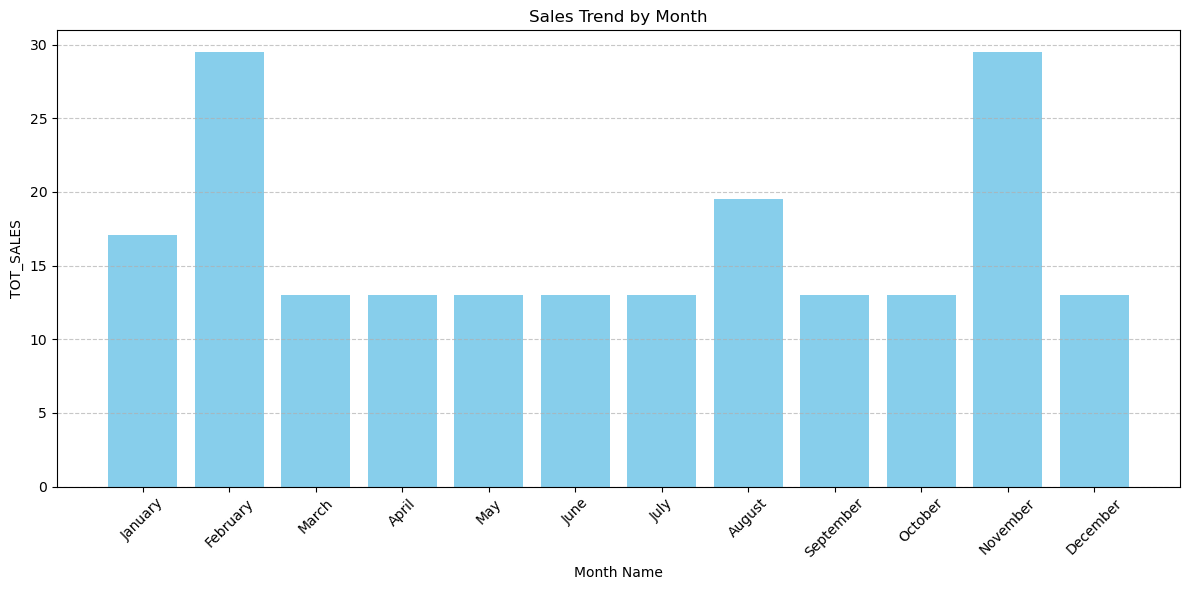

In [189]:
# Create a bar chart for sales trend by month
plt.figure(figsize=(12, 6))
plt.bar(trans['Month Name'], trans['TOT_SALES'], color='skyblue')
plt.xlabel('Month Name')
plt.ylabel('TOT_SALES')
plt.title('Sales Trend by Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# d. A visual representation in the form of a bar chart/line chart illustrated the sales trend by quarter

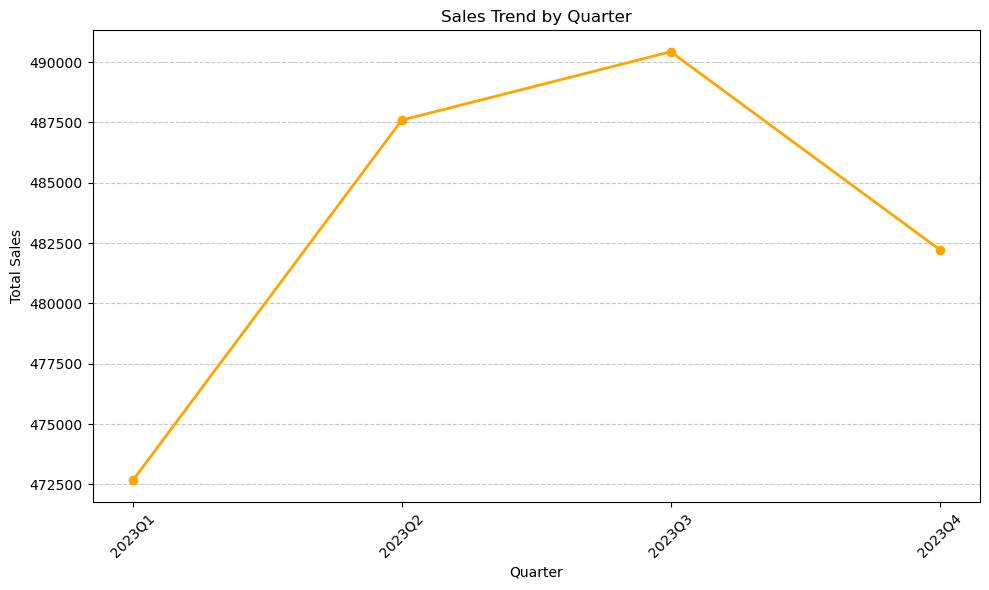

In [161]:
#Convert date to quarter
trans['Quarter'] = trans['DATE'].dt.to_period('Q')

# Aggregate sales by quarter
quarterly_sales = trans.groupby('Quarter')['TOT_SALES'].sum().reset_index()

# Create a line chart for sales trend by quarter
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales['Quarter'].astype(str), quarterly_sales['TOT_SALES'], marker='o', color='orange', linewidth=2)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

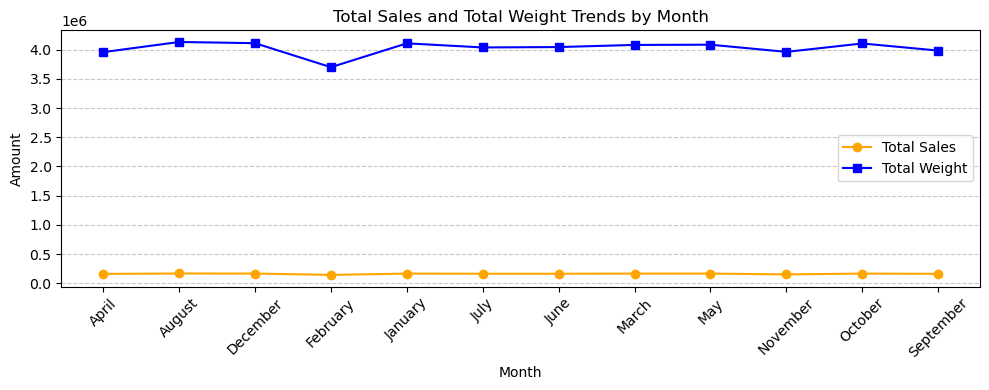

In [166]:
#e. Total Sales Trends by Weight and Months  

# Group by month and calculate total sales and total weight
monthly_data = trans.groupby('Month Name').agg({'TOT_SALES': 'sum', 'Weight': 'sum'}).reset_index()

# Create a line chart for total sales and total weight trends by month
plt.figure(figsize=(10, 4))
plt.plot(monthly_data['Month Name'], monthly_data['TOT_SALES'], marker='o', color='orange', label='Total Sales')
plt.plot(monthly_data['Month Name'], monthly_data['Weight'], marker='s', color='blue', label='Total Weight')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Total Sales and Total Weight Trends by Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

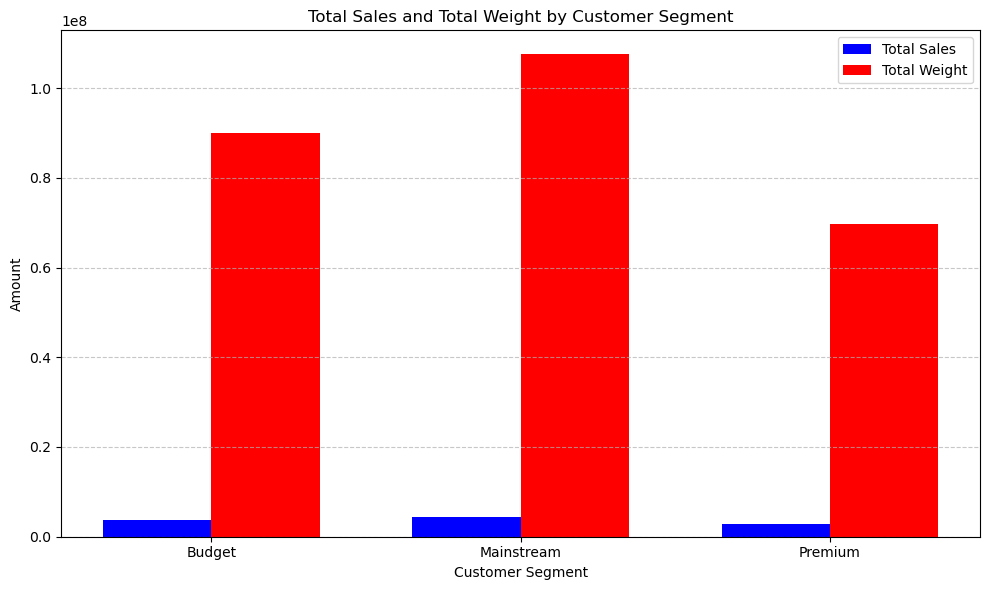

In [169]:
#f. Total Sales by Weights and Customer Segment  
# Group by customer segment and calculate total sales and total weight
segment_data = cust_trans.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES': 'sum', 'Weight': 'sum'}).reset_index()

# Plot the data using a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(segment_data))
plt.bar(index, segment_data['TOT_SALES'], bar_width, color='b', label='Total Sales')
plt.bar([i + bar_width for i in index], segment_data['Weight'], bar_width, color='r', label='Total Weight')
plt.xlabel('Customer Segment')
plt.ylabel('Amount')
plt.title('Total Sales and Total Weight by Customer Segment')
plt.xticks([i + bar_width / 2 for i in index], segment_data['PREMIUM_CUSTOMER'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [175]:
cust_trans['DATE']=pd.to_datetime(cust_trans['DATE'],format='%d-%b-%y')

In [176]:
cust_trans['Day'] = cust_trans['DATE'].dt.day

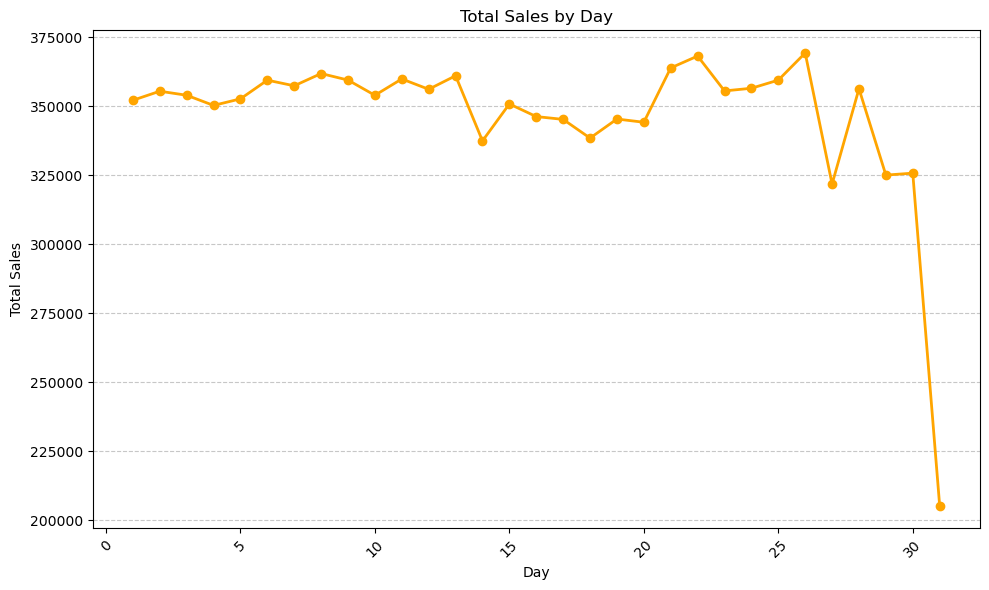

In [178]:
#g. Total Sales by Day  

# Group by day and calculate total sales
daily_sales =cust_trans.groupby('Day')['TOT_SALES'].sum().reset_index()

# Plot the data using a line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Day'], daily_sales['TOT_SALES'], marker='o', color='orange', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

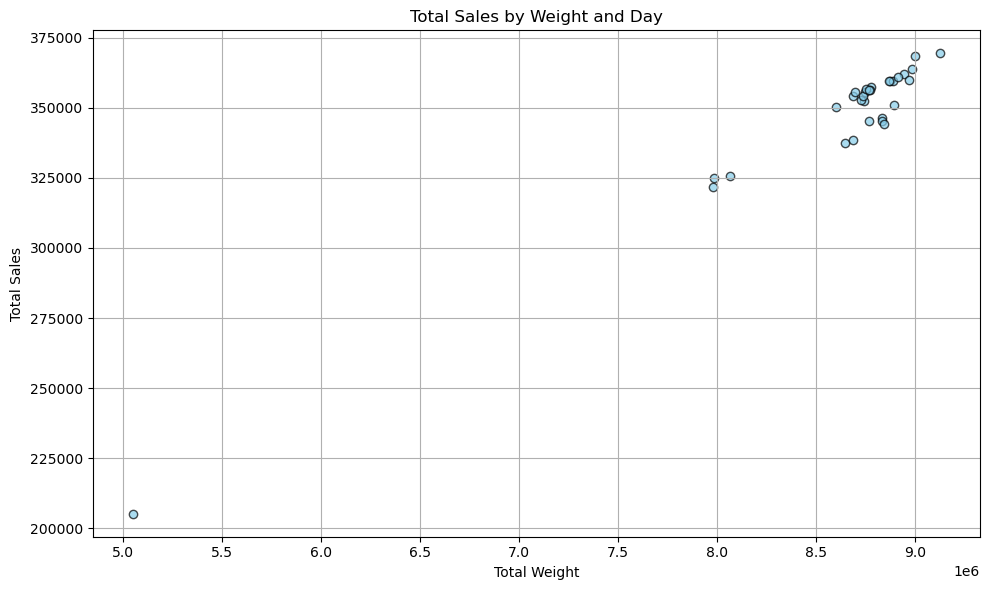

In [179]:
#h. Total Sales by Weight and Day   
# Group by day and calculate total sales and total weight for each day
daily_data = cust_trans.groupby('Day').agg({'TOT_SALES': 'sum', 'Weight': 'sum'}).reset_index()

# Plot the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_data['Weight'], daily_data['TOT_SALES'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Weight')
plt.ylabel('Total Sales')
plt.title('Total Sales by Weight and Day')
plt.grid(True)
plt.tight_layout()
plt.show()

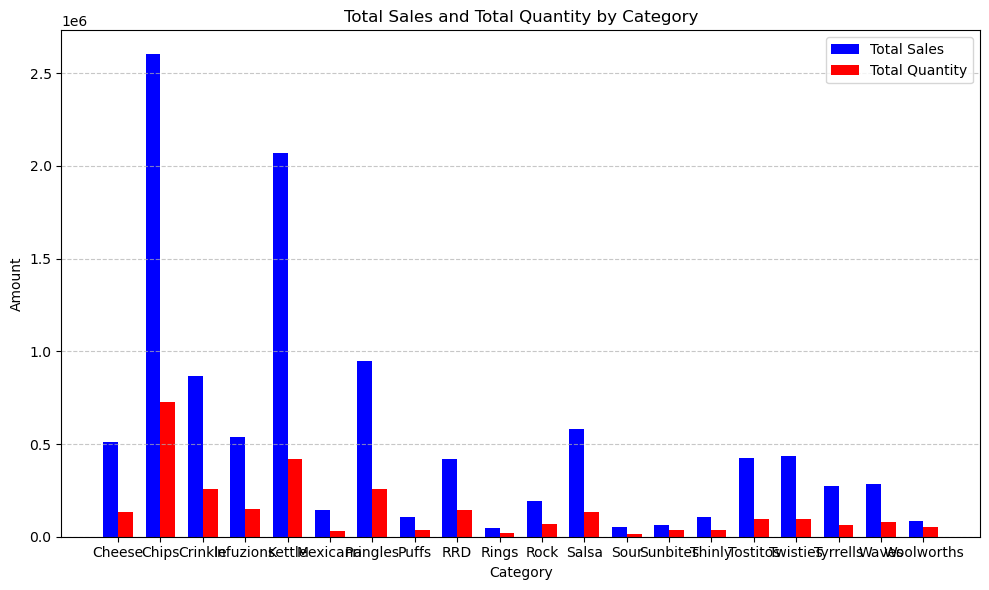

In [180]:
#i. Total Sales by Category and Quantity  

# Group by category and calculate total sales and total quantity for each category
category_data = cust_trans.groupby('Category').agg({'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).reset_index()

# Plot the data using a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(category_data))
plt.bar(index, category_data['TOT_SALES'], bar_width, color='b', label='Total Sales')
plt.bar([i + bar_width for i in index], category_data['PROD_QTY'], bar_width, color='r', label='Total Quantity')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Total Sales and Total Quantity by Category')
plt.xticks([i + bar_width / 2 for i in index], category_data['Category'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [181]:
cust_trans['Day of Week'] = cust_trans['DATE'].dt.day_name()
cust_trans['Weekend Flag'] = cust_trans['DATE'].dt.dayofweek.isin([5, 6])

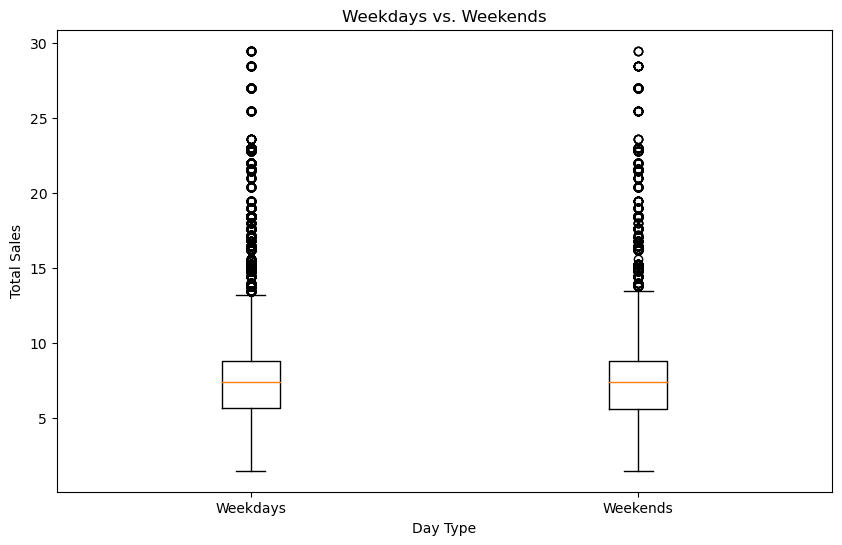

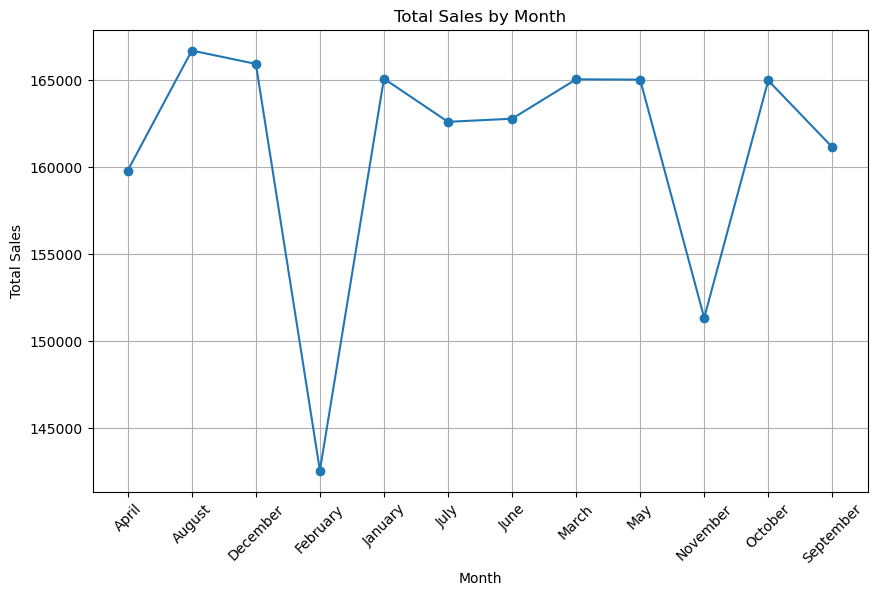

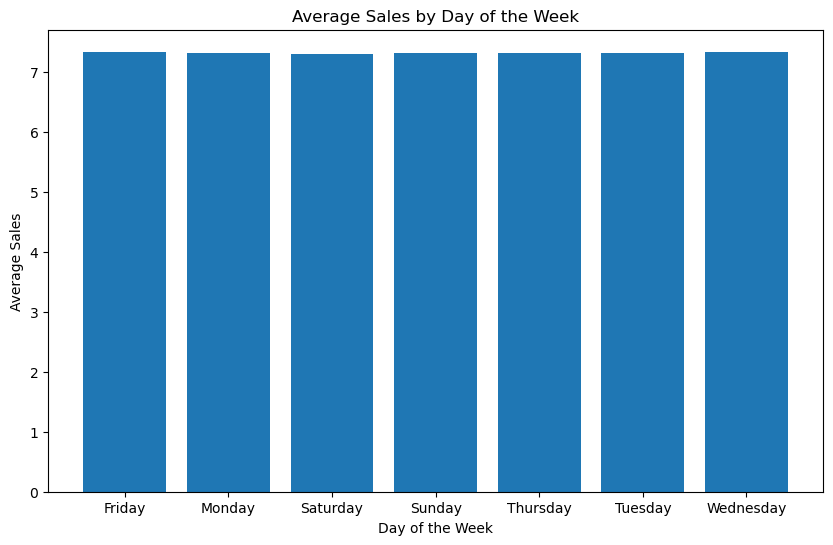

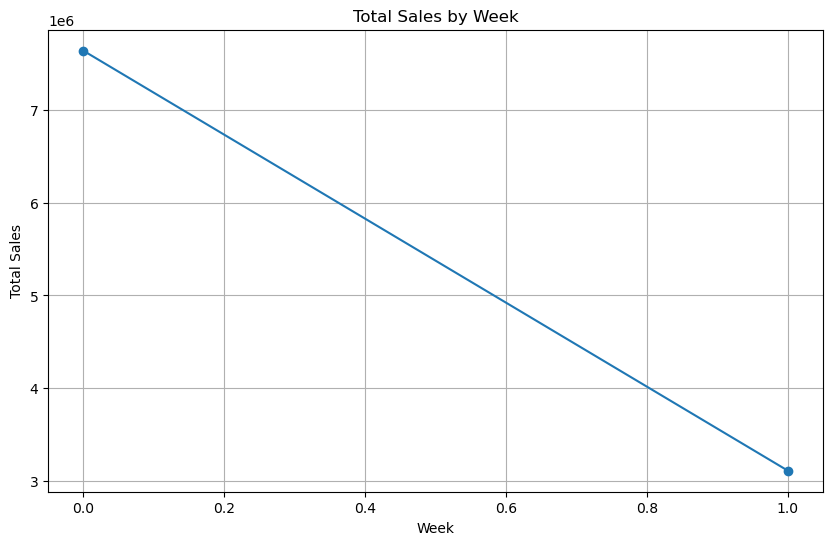

In [188]:
#j. Is there any seasonality in the sales (weekdays vs. weekends, months, days of week, weeks etc.)?

# Weekdays vs. Weekends

weekday_sales = cust_trans[cust_trans['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['TOT_SALES']
weekend_sales = cust_trans[cust_trans['Day of Week'].isin(['Saturday', 'Sunday'])]['TOT_SALES']
plt.figure(figsize=(10, 6))
plt.boxplot([weekday_sales, weekend_sales], labels=['Weekdays', 'Weekends'])
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.title('Weekdays vs. Weekends')
plt.show()

# Months
monthly_sales = trans.groupby('Month Name')['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month Name'], monthly_sales['TOT_SALES'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Days of the Week
daily_sales = cust_trans.groupby('Day of Week')['TOT_SALES'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(daily_sales['Day of Week'], daily_sales['TOT_SALES'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales by Day of the Week')
plt.show()

# Weeks
weekly_sales = cust_trans.groupby('Weekend Flag')['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['Weekend Flag'], weekly_sales['TOT_SALES'], marker='o')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Week')
plt.grid(True)
plt.show()
